In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime, timedelta

In [2]:
%matplotlib inline

# read and check the data

In [3]:
data = pd.read_csv('employee_retention_data.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [42]:
for c in data.columns:
    if c != 'quit_date':
        print np.sum(pd.isnull(data[c]))

0
0
0
0
0
0


no unintensional missing value

# estimate head count for each company on each day

In [6]:
import math
np.isnan(data['quit_date'][2])

True

In [7]:
g1 = data.groupby(['company_id','join_date'])
g2 = data.groupby(['company_id','quit_date'])

In [8]:
date = []
company = []
change = []
for name, group in g1:
    date.append(name[1]) 
    company.append(name[0])
    change.append(group.shape[0])
ret = pd.DataFrame({'change':change,'date':date, 'company':company, })
ret.head()

,change,company,date
0,25,1,2011-01-24
1,2,1,2011-01-25
2,2,1,2011-01-26
3,30,1,2011-01-31
4,7,1,2011-02-01


In [9]:
head_count = []
head_count.append(25)
for i in range(1,ret.shape[0]):
    if ret['company'][i] == ret['company'][i-1]:
        head_count.append(head_count[i-1]+ret['change'][i])
    else:
        head_count.append(ret['change'][i])

ret['head_count'] = head_count
ret.head()

,change,company,date,head_count
0,25,1,2011-01-24,25
1,2,1,2011-01-25,27
2,2,1,2011-01-26,29
3,30,1,2011-01-31,59
4,7,1,2011-02-01,66


company
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
dtype: object

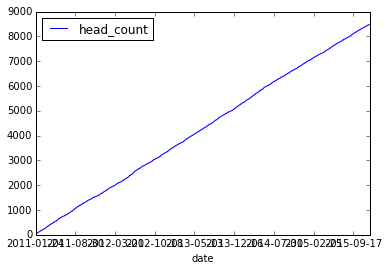

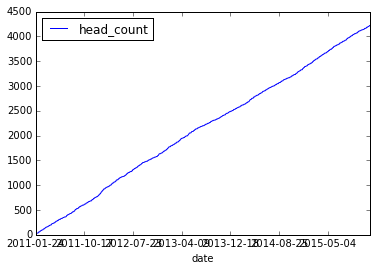

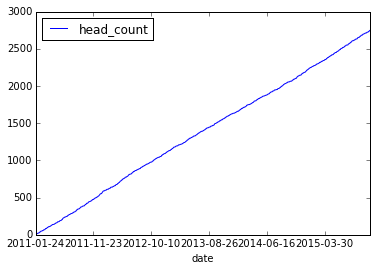

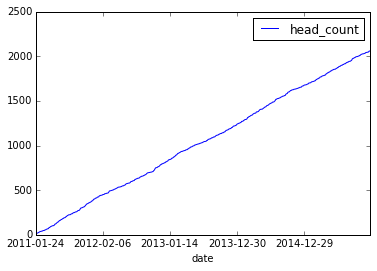

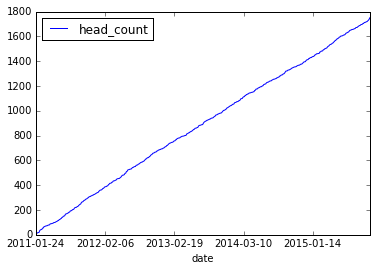

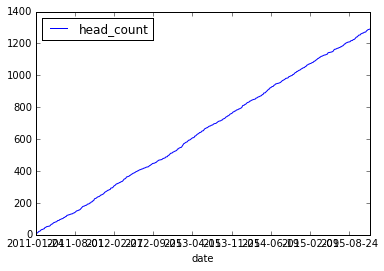

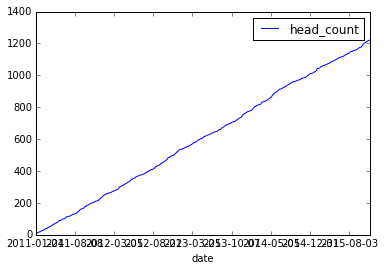

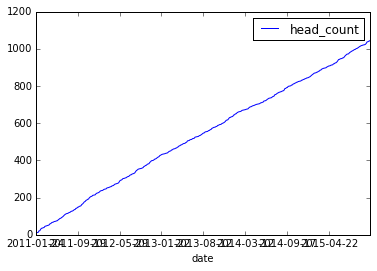

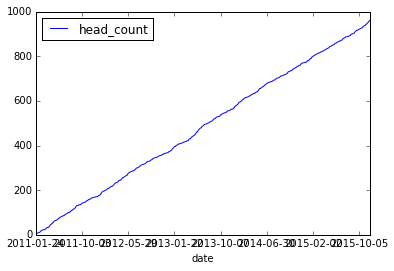

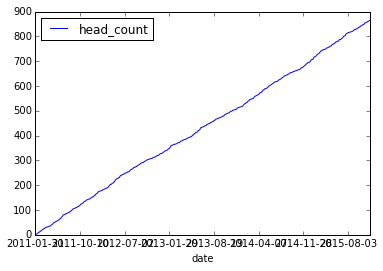

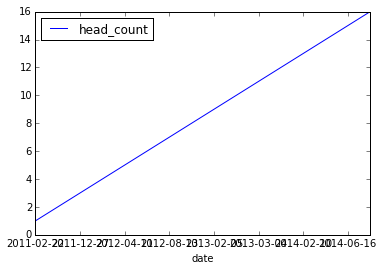

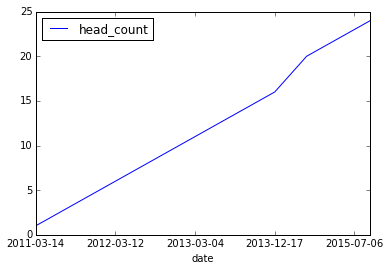

In [10]:
ret.groupby('company').plot(x='date',y='head_count')

In [11]:
g2 = data.groupby(['company_id','quit_date'])
date2 = []
company2 = []
change2 = []
for name, group in g2:
    date = name[1]
    company = name[0]
    change = group.shape[0]
    date2.append(date)
    company2.append(company)
    change2.append(-change)

ret2 = pd.DataFrame({'change':change2,'date':date2, 'company':company2})
ret2.head()

,change,company,date
0,-1,1,2011-10-21
1,-1,1,2011-11-11
2,-1,1,2011-11-22
3,-1,1,2011-11-25
4,-1,1,2011-12-09


company
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
dtype: object

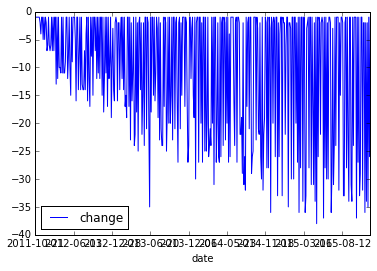

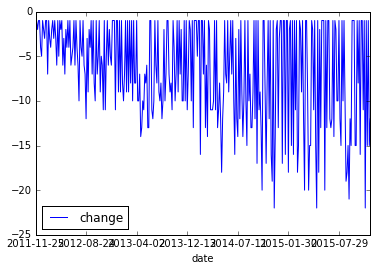

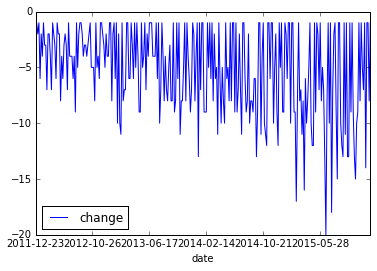

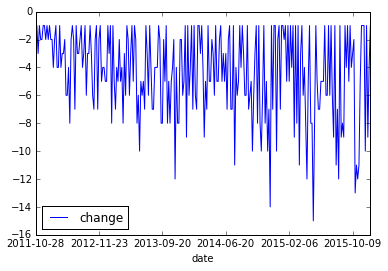

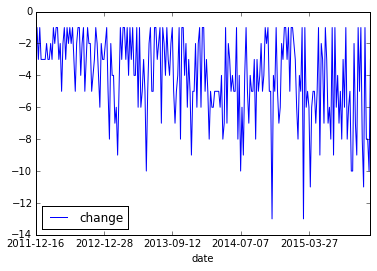

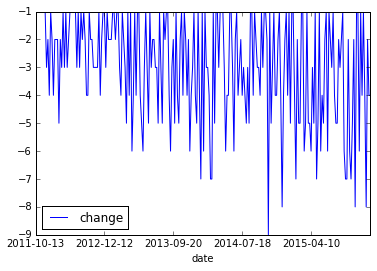

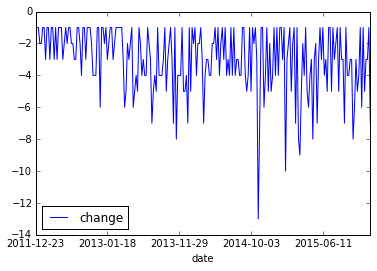

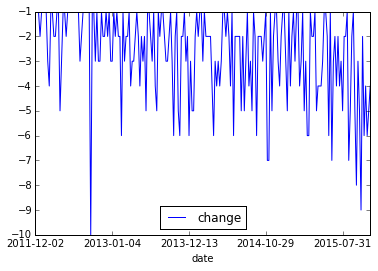

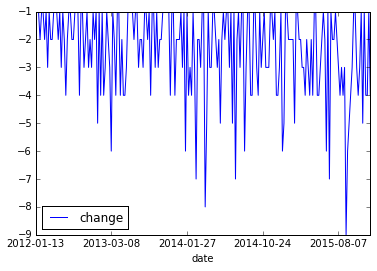

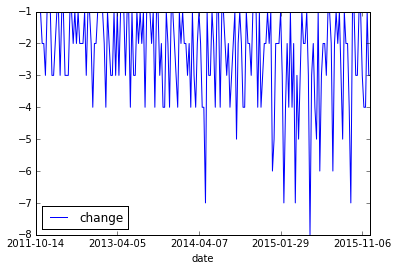

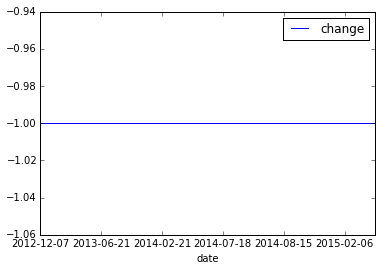

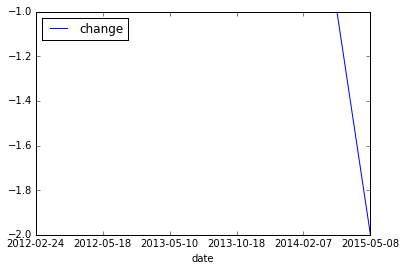

In [230]:
ret2.groupby('company').plot(x='date',y='change')

In [12]:
# start = '2011-01-24'
# end = '2015-12-13'

dt = datetime(2011, 01, 24)
end = datetime(2015, 12, 14)
step = timedelta(days = 1)

dates = []

while dt < end:
    dates.append(dt.strftime('%Y-%m-%d'))
    dt += step

companies = range(1,13)


In [13]:
x = []
y = []
z = []

total = pd.DataFrame()
for d in dates:
    for c in companies:
        x.append(d) 
        y.append(c)

total['date'] = x
total['company'] = y
# total['head_count'] = z

In [14]:
total = pd.merge(total, ret, on=['date','company'], how = 'left').drop('change',axis = 1).sort_values(by = ['date','company'])
# total = total.drop(['change_x','change_y','head_count_x'],axis = 1)
total.head(12)

,date,company,head_count
0,2011-01-24,1,25.0
1,2011-01-24,2,17.0
2,2011-01-24,3,9.0
3,2011-01-24,4,12.0
4,2011-01-24,5,5.0
5,2011-01-24,6,3.0
6,2011-01-24,7,1.0
7,2011-01-24,8,6.0
8,2011-01-24,9,3.0
9,2011-01-24,10,NaN


In [15]:
total.iloc[11,2] = 0
total.iloc[10,2] = 0
total.iloc[9,2] = 0

total = total.sort_values(by = ['company','date'])

In [16]:
total = pd.merge(total, ret2, on=['date','company'], how = 'left')
total.head()

,date,company,head_count,change
0,2011-01-24,1,25.0,NaN
1,2011-01-25,1,27.0,NaN
2,2011-01-26,1,29.0,NaN
3,2011-01-27,1,NaN,NaN
4,2011-01-28,1,NaN,NaN


In [17]:
for i in range(1,total.shape[0]):
    if total.iloc[i,1] == total.iloc[i-1,1]:
        if not math.isnan(total.iloc[i,3]):
            if not math.isnan(total.iloc[i,2]):
                total.iloc[i,2] += total.iloc[i,3]
            else:
                total.iloc[i,2] = total.iloc[i-1,2]+total.iloc[i,3]
        else:   
            if math.isnan(total.iloc[i,2]):
                total.iloc[i,2] = total.iloc[i-1,2]
    else:
        if not math.isnan(total.iloc[i,3]):
            total.iloc[i,2] += total.iloc[i,3]

In [18]:
total = total.drop('change',axis = 1)
total

,date,company,head_count
0,2011-01-24,1,25.0
1,2011-01-25,1,27.0
2,2011-01-26,1,29.0
3,2011-01-27,1,29.0
4,2011-01-28,1,29.0
5,2011-01-29,1,29.0
6,2011-01-30,1,29.0
7,2011-01-31,1,59.0
8,2011-02-01,1,66.0
9,2011-02-02,1,67.0


company
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
dtype: object

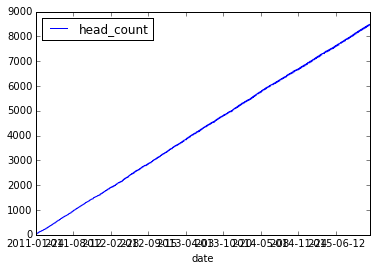

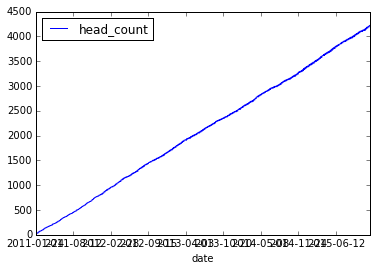

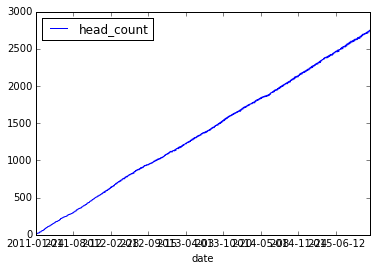

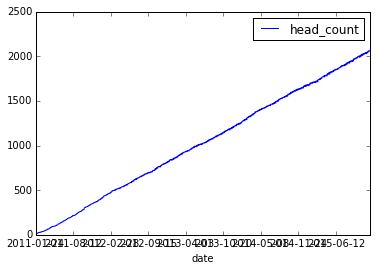

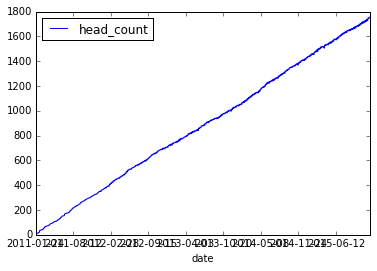

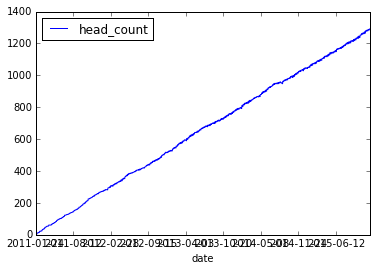

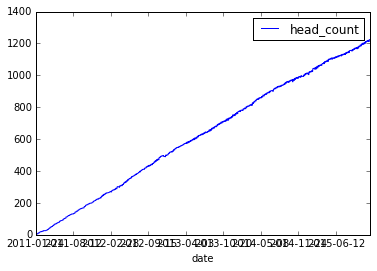

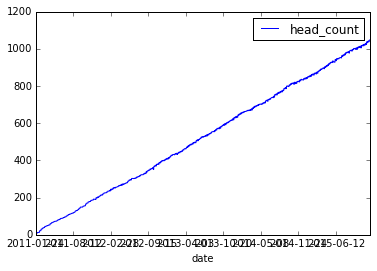

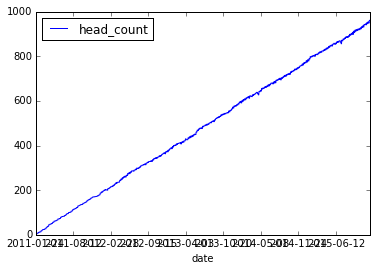

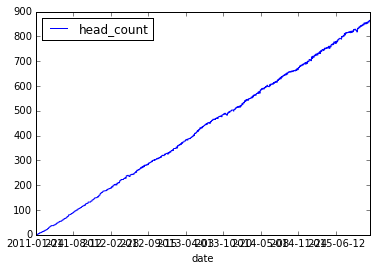

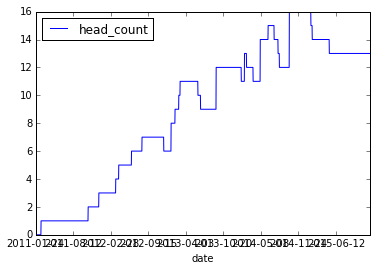

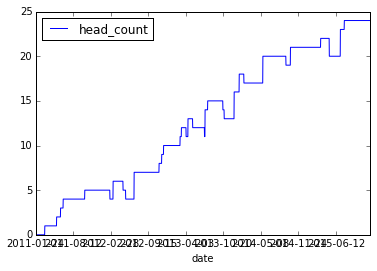

In [19]:
total.groupby('company').plot(x='date',y='head_count')

# let's see why the last two companies are bad.

In [20]:
data.groupby(['company_id']).agg({'salary':np.mean})

,salary
company_id,
1,152167.570115
2,155728.090952
3,122118.588578
4,122721.144520
5,123348.717949
6,119925.639040
7,121582.516340
8,122284.622732
9,123905.306972


they have considerably lower average salary,let's see the dept distribution

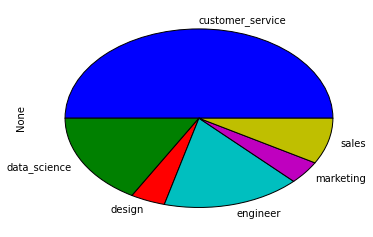

In [35]:
data[data['company_id']==12].groupby('dept').size().plot(kind='pie')

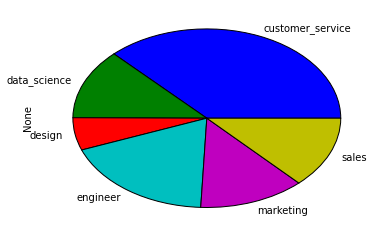

In [40]:
data[data['company_id']==1].groupby('dept').size().plot(kind='pie')

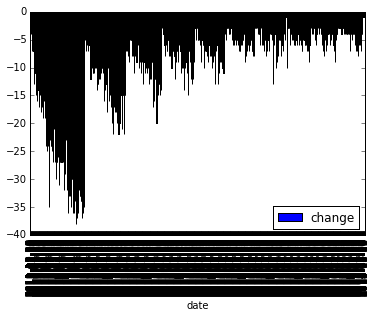

In [32]:
ret2.plot(x='date', y='change', kind='bar')

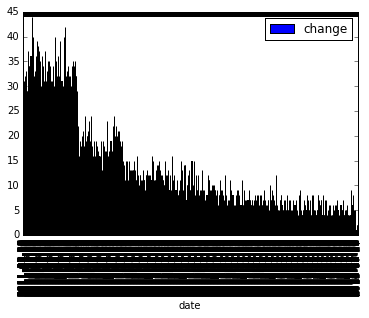

In [33]:
ret.plot(x='date', y='change', kind='bar')